## 1. Revisiting MLP of Assignment1





*    Reference. https://github.com/Justin-A/DeepLearning101/blob/master/2-1_MNIST_MLP.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.1.0+cu121  Device: cpu


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 36308286.57it/s]


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27726183.07it/s]


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31475643.75it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10842645.86it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



*    The code above loads the data with PyTorch function 'datasets' and 'DataLoader', and works only for MNIST.
*    Can we make our custom datasets and dataloader?
*    Please download a zip file from https://www.kaggle.com/datasets/andrewmvd/animal-faces, and upload the file to your Colab (Google Drive).

In [5]:
# connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### (1) Using torchvision.transforms
*     Reference. https://www.kaggle.com/code/eduardignatev/madmo-pro-homework-02#Load-Data

In [6]:
transform_train = transforms.Compose([ ## Data transformation only for train data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)
    transforms.ToTensor(), ## To 'Pytorch Tensor' -> Pytorch Deep Learning Models like CNN (we'll deal with it later on) get only tensor as an input
])
transform_val = transforms.Compose([ ## Data transformation only for validation (here, it works like the 'test' data...) data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.ToTensor() ## To 'Pytorch Tensor'
])

## Please note that the data augmentation technique is not usually implemented to validation/test dataset
## This is why we split transform_train and transform_val -- transform_val does not need
## transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)

train_data = datasets.ImageFolder(root='/content/drive/MyDrive/intro-dl/afhq/train', transform=transform_train)
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/train')
## and applies transform_train as defined above.
val_data = datasets.ImageFolder(root='/content/drive/MyDrive/intro-dl/afhq/val', transform=transform_val)
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/val')
## and applies transform_val as defined above.

train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in train_data as defined above with the batch size of 16.
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in val_data as defined above with the batch size of 16.

In [7]:
train_data.class_to_idx ## It automatically catches the classes in train_data -> check it by yourself!
## (see /content/drive/MyDrive/intro-dl/afhq/val directory in your Google Drive)

{'cat': 0, 'dog': 1, 'wild': 2}

In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
## brings the next images and labels

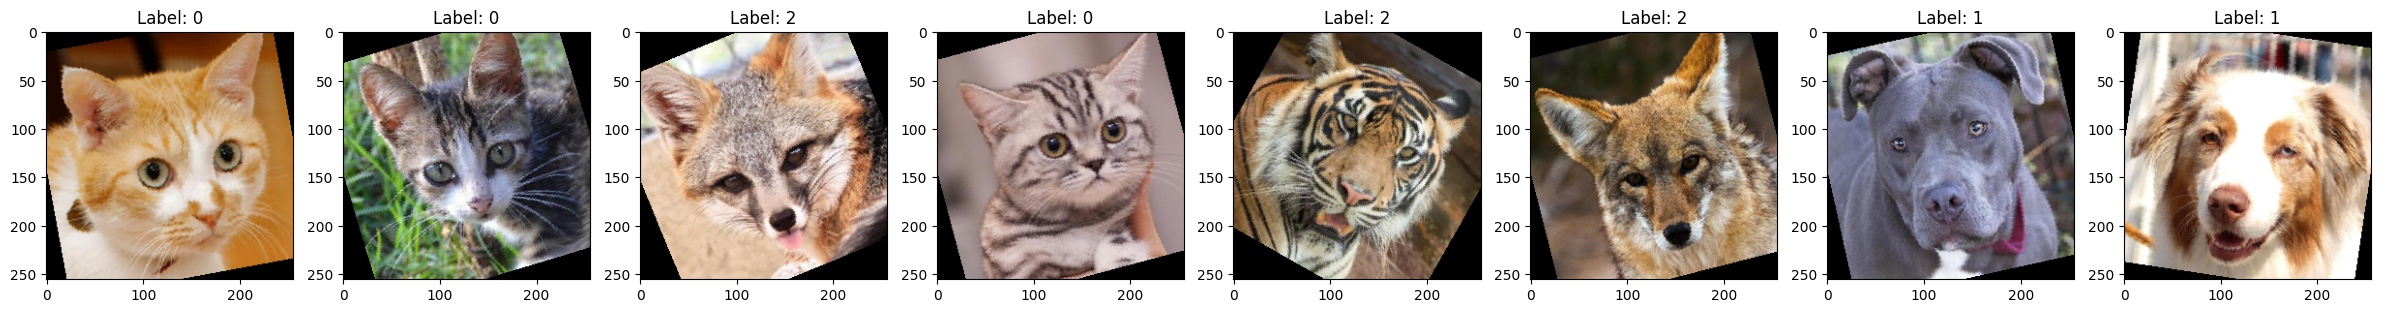

In [9]:
def show_imgs(imgs, labels, preds=None):
    f, axes= plt.subplots(1, 8, figsize=(30,5))
    for i, axis in enumerate(axes):
        axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
        axes[i].set_title(f'Label: {labels[i].numpy()}')
        if preds != None:
            axes[i].set_xlabel(f'Pred: {np.argmax(preds[i].numpy())}')
    plt.show()

show_imgs(images, labels)

## shows the sample train_data
## 30 degree rotation!

#### (2) Making a customized datasets and dataloader

In [ ]:
## We'll use the library 'os' -- please revisit Assignment1

In [10]:
import os

In [11]:
train_cat = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/cat')
train_dog = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/dog')
train_wild = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/wild')

In [ ]:
# WARNING: DO NOT RUN THIS CODE. IT TAKES TOO LONG TIME TO GET THE RESULT.

train_cat_image = []
train_dog_image = []
train_wild_image = []

train_cat_target = []
train_dog_target = []
train_wild_target = []

for i in range(len(train_cat)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/cat', train_cat[i]))
  train_cat_image.append(image)
  train_cat_target.append(0)

for i in range(len(train_dog)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/dog', train_dog[i]))
  train_dog_image.append(image)
  train_dog_target.append(1)

for i in range(len(train_wild)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/wild', train_wild[i]))
  train_wild_image.append(image)
  train_wild_target.append(2)

KeyboardInterrupt: 

### Question 1. Explain os.path.join function.

os.path.join function is used for joining one or more path components together. This concatenates multiple path components with the seperating character '/' beteween the components except the last component.

## 2. Backpropagation and PyTorch Autograd

*   https://kingnamji.tistory.com/44



In [ ]:
import torch

In [ ]:
w = torch.tensor(3.0, requires_grad = True) ## requires_grad = True: it saves the gradient

In [ ]:
y = w**3 + 10

In [ ]:
y.backward() ## backward() calculates the derivative

In [ ]:
print(f'Differentiating y by w: {w.grad}') ## check it by yourself!! dy/dw = 3*w^2 ..., so

Differentiating y by w: 27.0


In [ ]:
## Another example with the loss fuction
import torch
import torch.nn as nn

In [ ]:
x = torch.ones(5)  # input
y = torch.zeros(3)  # output

w = torch.randn(5, 3, requires_grad=True) # weight
b = torch.randn(3, requires_grad=True) # bias

In [ ]:
z = torch.matmul(x, w) + b # z = wx + b
loss_fn = nn.MSELoss() # loss function

In [ ]:
loss = loss_fn(z, y)

loss.backward()

In [ ]:
print(f'Differentiating loss by w :\n {w.grad}')
print(f'Differentiating loss by b : {b.grad}')

Differentiating loss by w :
 tensor([[ 0.8417,  0.2076, -2.9975],
        [ 0.8417,  0.2076, -2.9975],
        [ 0.8417,  0.2076, -2.9975],
        [ 0.8417,  0.2076, -2.9975],
        [ 0.8417,  0.2076, -2.9975]])
Differentiating loss by b : tensor([ 0.8417,  0.2076, -2.9975])


### Question 2. PyTorch Autograd and DataLoader
##### Read the following document and summarize it.
##### https://velog.io/@euisuk-chung/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98-%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98-%EA%B8%B0%EC%B4%88-%EC%9A%94%EC%86%8C-Autograd%EB%9E%80

신경망(Neural Network)의 학습은 다음의 두가지 방법을 통해 진행된다.

1. 순전파 (Forward Propagation)
- 함수에서 실행한 입력데이터 값을 통해 정답을 맞추기 위한 최선의 예측을 한다. 계산을 할 때는 input data에서 output까지 순서대로 계산을 진행한다.
2. 역전파 (Backward Propagation)
- 추측값에서 발생한 error와 이에 대한 gradient를 통해 parameter 값들을 업데이트한다. 주로 경사하강법 (Gradient Descent)을 이용한다.


신경망 학습 알고리즘

1. 임의의 hyper parameter(w)설정
2. input data와 w를 통해 hidden layer의 값 계산
3. layer의 값과 w값을 통해 output 계산
4. error를 줄이기 위해 hidden layer와 output layer 사이의 w 업데이트
5. loss를 줄이기 위해 input layer와 hiddne layer 사이의 w 업데이트
6. error가 충분히 작아질 때까지 두번째~다섯번째 단계를 반복
* 2, 3 단계 : 순전파 과정 / 4, 5 단계 : 역전파 과정


# Autograd
pyTorch를 이용해 역전파를 통해 parameter를 업데이트하는 방법

MLP 코드를 예시로 살펴보면 다음과 같다.



In [12]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [13]:
BATCH_SIZE = 32


In [14]:
INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 2
LEARNING_RATE = 1e-6



In [15]:
x = torch.randn(BATCH_SIZE,
                INPUT_SIZE,
                device = device,
                dtype = torch.float,
                requires_grad = False)


y = torch.randn(BATCH_SIZE,
                OUTPUT_SIZE,
                device = device,
                dtype = torch.float,
                requires_grad = False)


w1 = torch.randn(INPUT_SIZE,
                 HIDDEN_SIZE,
                 device = device,
                 dtype = torch.float,
                 requires_grad = True)


w2 = torch.randn(HIDDEN_SIZE,
                 OUTPUT_SIZE,
                 device = device,
                 dtype = torch.float,
                 requires_grad = True)


In [17]:
from torch import nn


for t in range(1, 501):

    hidden = x.mm(w1)
    hidden = nn.ReLU()(hidden)
    y_pred = hidden.mm(w2)


    loss = (y_pred - y).pow(2).sum()


    if t % 100 == 0:
        print(t, "th Iteration: ", sep = "")
        print(">>>> Loss: ", loss.item())


    loss.backward()


    with torch.no_grad():

        w1 -= LEARNING_RATE * w1.grad
        w2 -= LEARNING_RATE * w2.grad


        w1.grad.zero_()
        w2.grad.zero_()

100th Iteration: 
>>>> Loss:  0.0030221999622881413
200th Iteration: 
>>>> Loss:  1.2680551435551024e-06
300th Iteration: 
>>>> Loss:  3.512805051286705e-07
400th Iteration: 
>>>> Loss:  1.9894345371085365e-07
500th Iteration: 
>>>> Loss:  1.5318774160277826e-07


100th, 200th, 300th, 400th, 500th loss들을 비교해보면 loss가 점점 작아지는 것을 확인할 수 있다.

# Computational Graph (연산 그래프)
- autograd는 실행된 모든 연산의 기록을 DAC(Directed Acyclic Graph)에 저장하는데 DAG의 전반적인 계산 과정을 그래프로 나타는 것이 연산 그래프이다. 이때, leave 는 input data이고, root는 output data이다.

- 순전파 단계에서 autograd는 요정된 연산을 수행하여 output data를 계산하고 DAG연산의 gradient function을 유지한다.
- 역전파 단계에서 autograd는 root에서 .backward()가 호출될 때 시작되는데, 각 .grad_fn으로부터 gradient를 계산하고 각 .grad 속성에 계산 결과를 저장한다. chain rule을 이용하여 모든 leave에 전파한다.

## 3. Vanishing Gradient Problem

In [18]:
import matplotlib.pyplot as plt #시각화를 위해 matplotlib.pyplot import
import numpy as np #arrays와 matrices를 다루기 위해 numpy import
import pandas as pd #데이터 분석을 위해 pandas import
import tensorflow as tf #머신러닝 모델을 학습시키기 위해 tensorflow import
import warnings #예기치 못한 결과가 발생했을 때 알리기 위한 warning import
from matplotlib.colors import ListedColormap #시각화 과정에서 custom 컬러맵을 위해 ListedColormap import
from mlxtend.plotting import plot_decision_regions #다양한 머신러닝 학습을 수행하기 위해 plot_decision_regions import
from pylab import rcParams #디폴트 세팅 저장을 위해 rcParams import
from sklearn.datasets import make_circles, make_moons #분류 문제에 대한 합성 데이터를 만들기 위해 make_circles, make_moons import
from sklearn.model_selection import train_test_split #데이터를 학습 데이터와 테스트 데이터로 나뉘기 위해 train_test_split import
from tensorflow.keras.layers import Dense #fully-connected neural network layer를 위해 Dense import
from tensorflow.keras.models import Sequential #neural network 모델을 위한 linear stack of layer를 만들기 위해 Sequential import

In [19]:
np.set_printoptions(suppress=True) #부동소수점 숫자를 표현할 때, 지수표기법을 사용하지 않도록 한다.
zero_one_colourmap = ListedColormap(('white', 'red')) #plotting에 사용될 흰색과 빨간색으로 이루어진 컬러맵을 생성한다.
rcParams['figure.figsize'] = 14, 7 #넓이 14인치, 높이 7인치의 기본 사이즈를 설정한다.
rcParams['axes.facecolor'] = '#383838' #축의 기본 색상을 어두운 회색으로 설정한다.(색 번호 : #383838 )

In [20]:
X, y = make_circles(n_samples = 1000, #1000개의 데이터를 동심원 형태로 배열한다.
                    factor=0.85, #외부의 원과 내부 원의 비율을 나타낸다. 이 경우 내부의 원이 외부 원 크기의 85%임을 의미한다.
                    random_state=2021, # seed for the random number generator로 사용되는 parameter를 설정한다.
                    noise=0.1) # data에 추가되는 noise를 설정한다.

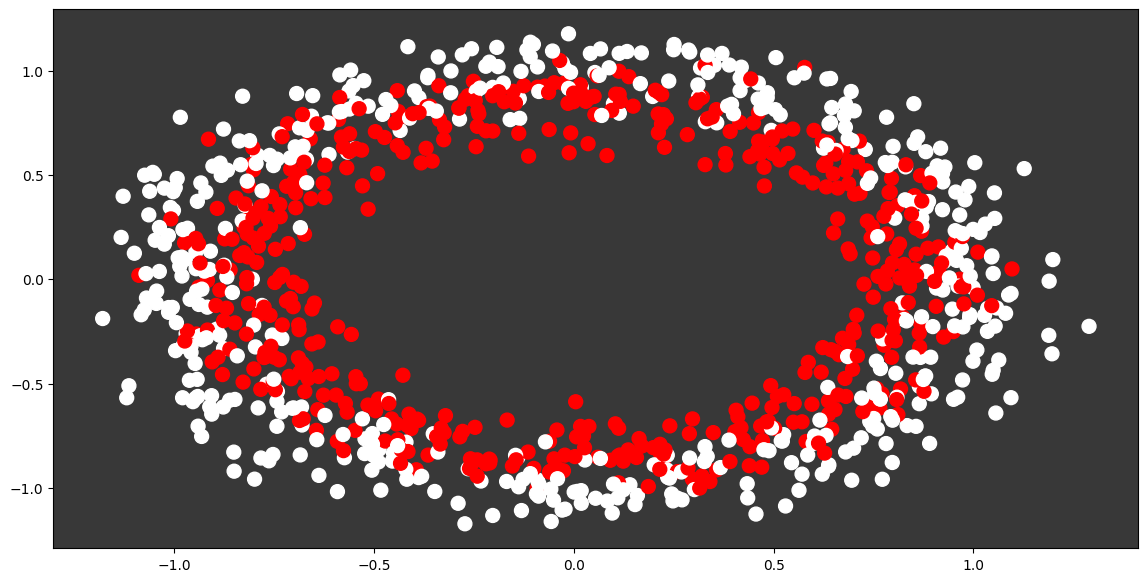

In [21]:
plt.scatter(X[:,0],X[:,1], #scatter plot을 형성한다. data point의 X,Y좌표를 나타낸다.
            c=y, s=100, #포인트의 색깔을 y가 결정한다. 포인트의 사이즈를 100으로 설정한다.
            cmap = zero_one_colourmap) #포인트의 coloring에 사용되는 cmap을 설정한다.
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, #데이터셋을 학습데이터와 테스트데이터로 나눈다.
                                                   test_size=0.33, #33%의 데이터는 테스트 데이터로 67%의 데이터는 학습 데이터셋으로 나눈다.
                                                    random_state=42) #random seed를 42로 설정한다.


In [23]:
def get_model(inp_activation): #neural network 모델을 정의한다.
  model = Sequential() #Sequential model을 사용한다.
  model.add(Dense(10,input_dim=2, activation=inp_activation)) #input dimension = 2, specified activation function
  model.add(Dense(10, activation = inp_activation)) #각 hidden layer에 10개의 node와 activation function
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid")) #output layer에 1개의 node, binary classification을 위해 sigmoid activation function을 사용한다.
  model.compile(loss='binary_crossentropy', #모델을 compile하기 위해 loss, optimizer, accuracy matrix를 설정한다.
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [24]:
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
  gradient = (old_weight - new_weight)/ learning_rate #가중치 업데이트의 gradient를 계산한다.
  pct_change_weight = abs(100*(old_weight - new_weight)/ old_weight) #가중치의 변화의 백분율을 계산한다.
  return gradient, pct_change_weight

*     Sigmoid Model

In [25]:
sigmoid_model = get_model("sigmoid") #sigmoid activation function 을 사용하는 neural network모델을 생성한다.

In [26]:
sigmoid_model.summary() #sigmoid 모델의 구조와 parameter에 대한 summary를 출력한다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [27]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][0]
#sigmoid 모델의 첫번째 layer의 가중치를 지정한다.
#첫번째[0] : 리스트에서 첫번째 layer의 가중치 선택
#두번째[0] : 첫번째 layer의 실제 가중치 matrix를 선택

In [28]:
sigmoid_model_first_layer_weights

array([-0.6539766 ,  0.13571215, -0.68569094, -0.08191562,  0.02106667,
       -0.31746423,  0.56807965, -0.34105802, -0.15042192, -0.59501827],
      dtype=float32)

In [29]:
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs = 1,
#학습과정에 대한 정보를 저장한다.
#한번의 epoch만큼 학습 데이터를 통해 모델을 학습한다.
                            validation_data = (X_test, y_test))
#학습데이터를 이용해 모델의 성능을 확인한다.

21/21 [==============================] - 4s 26ms/step - loss: 0.7396 - accuracy: 0.4881 - val_loss: 0.7062 - val_accuracy: 0.5242


In [30]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]
#한번의 epoch 학습 이후 가중치를 업데이트하기 위해 다시 sigmoid_model.get_weights()[0][0]를 사용하고 이를 sigmoid_model_first_layer_weights_updated에 지정한다.

In [31]:
sigmoid_model_first_layer_weights_updated

array([-0.65397614,  0.13571146, -0.68569106, -0.08191585,  0.0210664 ,
       -0.31746408,  0.5680795 , -0.34105745, -0.15042152, -0.59501857],
      dtype=float32)

In [32]:
s_gradient, s_weight_change = change_in_weight_gradient(sigmoid_model_first_layer_weights,
                                                        sigmoid_model_first_layer_weights_updated,
                                                        #원래 가중치와 업데이트된 가중치에 대한 변화율과 gradient를 계산한다.
                                                        sigmoid_model.optimizer.get_config()["learning_rate"])
                                                        #sigmoid 모델의 optimizer에서 사용한 learning rate를 가져온다.

In [33]:
s_gradient #계산된 gradient를 저장한다.

array([-0.00047684,  0.00068545,  0.00011921,  0.00023097,  0.00026263,
       -0.00014901,  0.00017881, -0.00056624, -0.00040233,  0.00029802],
      dtype=float32)

In [34]:
s_weight_change #계산된 변화율을 저장한다.

array([0.00007291, 0.00050508, 0.00001739, 0.00028196, 0.00124668,
       0.00004694, 0.00003148, 0.00016603, 0.00026747, 0.00005009],
      dtype=float32)

*     ReLU Model

In [35]:
activation_model = get_model("relu") #Relu 모델을 생성한다.

In [36]:
activation_model_old_first_layer_weight = activation_model.get_weights()[0][0]
#Relu 모델의 첫번째 layer의 가중치를 지정한다.
#첫번째[0] : 리스트에서 첫번째 layer의 가중치 선택
#두번째[0] : 첫번째 layer의 실제 가중치 matrix를 선택
activation_model_old_first_layer_weight

array([ 0.6366369 , -0.55086505,  0.3019759 ,  0.4828146 , -0.51743686,
        0.49713618, -0.66259295,  0.22790164, -0.23919854,  0.6829917 ],
      dtype=float32)

In [37]:
activation_history = activation_model.fit(X_train, y_train, epochs = 1,
                                          validation_data = (X_test, y_test))
#학습 과정에 대한 정보를 저장한다.
#한번의 epoch만큼 학습 데이터를 통해 모델을 학습한다.
#학습데이터를 이용해 모델의 성능을 확인한다.

21/21 [==============================] - 3s 37ms/step - loss: 0.6933 - accuracy: 0.4791 - val_loss: 0.6930 - val_accuracy: 0.5697


In [38]:
activation_model_updated_first_layer_weight = activation_model.get_weights()[0][0]
#한번의 epoch 학습 이후 가중치를 업데이트하기 위해 다시 activation_model.get_weights()[0][0]를 사용하고 이를 activation_model_updated_first_layer_weight에 지정한다.

In [39]:
activation_model_updated_first_layer_weight

array([ 0.63760537, -0.54214084,  0.30321428,  0.48507997, -0.52398324,
        0.49747744, -0.67029357,  0.22273026, -0.24795614,  0.68242353],
      dtype=float32)

In [40]:
relu_gradient, relu_weight_change = change_in_weight_gradient(activation_model_old_first_layer_weight,
                                                              activation_model_updated_first_layer_weight,
                                                              #원래 가중치와 업데이트된 가중치에 대한 변화율과 gradient를 계산한다.
                                                              activation_model.optimizer.get_config()["learning_rate"])
                                                              #Relu 모델의 optimizer에서 사용한 learning rate를 가져온다.

In [41]:
relu_gradient #계산된 gradient를 저장한다.

array([-0.9684562 , -8.724213  , -1.2383759 , -2.265364  ,  6.5463777 ,
       -0.34126636,  7.7006216 ,  5.1713734 ,  8.757606  ,  0.5681515 ],
      dtype=float32)

In [42]:
relu_weight_change #가중치 변화를 저장한다.

array([0.15212066, 1.5837295 , 0.41009095, 0.46919954, 1.265155  ,
       0.06864646, 1.162195  , 2.2691252 , 3.661229  , 0.08318571],
      dtype=float32)

### Question 3.
##### Check out this YouTube and write a line-by-line explanation of the code above -- ChatGPT allowed.
##### https://youtube.com/watch?v=wTyZqtJyp5g

In [ ]:
## Quick Question.
## Explain np.hstack, np.vstack, np.concatenate with proper examples. Google it and write your own answer.



1. np.hstack - 수평방향으로 array들을 합치는 것 (horizontal)

In [45]:
import numpy as np

a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[0, 2, 4, 6], [0, 1, 3, 5]])

np.hstack((a, b))

array([[1, 3, 5, 0, 2, 4, 6],
       [2, 4, 6, 0, 1, 3, 5]])

2. np.vstack - 수직방향으로 array들을 합치는 것 (vertical)

In [47]:
a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[2, 4, 6], [1, 3, 5]])

np.vstack((a, b))

array([[1, 3, 5],
       [2, 4, 6],
       [2, 4, 6],
       [1, 3, 5]])

3. np.concatenate - 지정된 축을 기준으로 array들을 합치는 것

- axis=0 : array들이 첫번째 축(행)을 따라 연결된다. 2차원 배열의 경우 np.vstack과 결과가 같다.
- axis=1 : array들이 두번째 축(열)을 따라 연결된다. 2차원 배열의 경우 np.hstack과 결과가 같다.

In [49]:
a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[2, 4, 6], [1, 3, 5]])

np.concatenate((a, b), axis=0)

array([[1, 3, 5],
       [2, 4, 6],
       [2, 4, 6],
       [1, 3, 5]])

In [50]:
a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[2, 4, 6], [1, 3, 5]])

np.concatenate((a, b), axis=1)

array([[1, 3, 5, 2, 4, 6],
       [2, 4, 6, 1, 3, 5]])

In [ ]:
X = np.hstack([raw_df.values[::2, :],
        raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
## Quick Question.
## Explain X, y, and train_test_split function above.


X - 'raw_df'이라는 데이터 프레임에서 값들을 추출한다. raw_df.values[::2, :]의 경우, 데이터 프레임에서 첫번째 행부터 시작하며 두칸씩 떨어진 행(홀수번째 행)들을 모든 열에 대해서 슬라이싱 한다. raw_df.values[1::2, :2]의 경우, 두번째 행부터 시작하여 두칸씩 떨어진 행(짝수번째 행)들을 두번째 열까지 슬라이싱한다. 그 다음 두 배열을 수평방향으로 합친다.

y -  'raw_df'이라는 데이터 프레임에서 값들을 추출한다. X와 마찬가지로 raw_df.values[1::2, :2]의 경우, 두번째 행부터 시작하여 두칸씩 떨어진 행들을 두번째 열까지 슬라이싱한다.

train_test_split(X, y, test_size=0.4, random_state=1) - 40%의 데이터는 테스트 데이터로 사용되고 나머지 60%의 데이터는 학습 데이터로 사용된다. random seed를 1로 고정하여 매 학습마다 data들이 똑같이 split되도록 설정한다.


## 5. Activation Function
*    Reference. https://sanghyu.tistory.com/182

In [ ]:
## 1. Sigmoid
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Sigmoid() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## 2. Tanh [Hyperbolic tangent]
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Tanh() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## 3. ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## 4. Leaky ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.LeakyReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

### Question 4.
##### Write the code for Maxout, ELU, and GELU in the same format.
##### For GELU, please search what GELU is and write your own answer.

In [ ]:
## Maxout
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Maxout()

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## ELU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ELU()

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## GELU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.GELU()

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

# GELU (Gaussian Error Linear Unit)
- GELU는 표준 정규 분포의 Cumulative Distribution Function을 이용해 정의된 activation function이다.

  𝐺𝐸𝐿𝑈(𝑥)=𝑥𝑃(𝑋≤𝑥)=𝑥Φ(𝑥)

  위와 같은 식을 근사하면 다음과 같은 식을 얻을 수 있다.

  0.5𝑥(1+𝑡𝑎𝑛ℎ[(√2/π)(𝑥+0.044715𝑥3)])

  Sigmoid나 tanh function을 사용할 경우 vanishing gradient problem이 발생할 수 있다는 점, ReLU fuunction을 사용할 경우 dying ReLU problem이 발생할 수 있다는 점을 고려했을 때, 대부분의 범위에서 적절한 gradient를 가지는 GELU function을 activation function으로 활용할 수 있다.


